In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
import os

In [2]:
#TEST TO MAKE SURE DATA CAN BE READ
dataDir = 'CleanDataFinal'

filepath = os.path.join(dataDir, 'trainFeaturesFinal.csv')
data_features = pd.read_csv (filepath, index_col = 'HHX')
print('trainX shape:', data_features.shape)

filepath = os.path.join(dataDir, 'trainTargetFinal.csv')
data_target = pd.read_csv (filepath, index_col = 'HHX')
print('trainY shape:', data_target.shape)

filepath = os.path.join(dataDir, 'testFeaturesFinal.csv')
data_features_test = pd.read_csv (filepath, index_col = 'HHX')
print('testX shape:', data_features_test.shape)

filepath = os.path.join(dataDir, 'testTargetFinal.csv')
data_targe_test = pd.read_csv (filepath, index_col = 'HHX')
print('testY shape:', data_targe_test.shape)

trainX shape: (22222, 5290)
trainY shape: (22222, 1)
testX shape: (5556, 5290)
testY shape: (5556, 1)


In [3]:
# Import data
data_train_features = data_features.dropna(axis=1)
data_train_target = data_target.dropna(axis=1)


data_test_features = data_features_test.dropna(axis=1)
data_test_targe = data_targe_test.dropna(axis=1)



Y_train = data_train_target.loc[:,'PHQCAT_A'].to_numpy()
X_train = data_train_features.to_numpy()


Y_test = data_test_targe.loc[:,'PHQCAT_A'].to_numpy()
X_test = data_test_features.to_numpy()

In [4]:
X_train.shape

(22222, 5290)

In [5]:
import sklearn
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, make_scorer, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.kernel_approximation import Nystroem
import matplotlib.pyplot as plt

from yellowbrick.classifier import ROCAUC

model = SVC(C=20,class_weight='balanced',decision_function_shape='ovr',probability=True, cache_size=2000)
feature_map_nystroem = Nystroem(gamma=.2,random_state=1,n_components=100)
X_train = feature_map_nystroem.fit_transform(X_train)
X_test = feature_map_nystroem.transform(X_test)

In [6]:
X_train.shape

(22222, 100)

In [7]:
# Setting up the model
model = SVC(C=20,probability=True, cache_size=2000)
model.fit(X_train, np.ravel(Y_train))

SVC(C=20, cache_size=2000, probability=True)

In [15]:
from sklearn.model_selection import GridSearchCV 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 20],
              'class_weight':['balanced'],
              'decision_function_shape':['ovr'],
              'probability':[True],
              'cache_size':[4000]}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, np.ravel(Y_train))

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

grid_predictions = grid.predict(X_test)
 
# print classification report
print(classification_report(Y_test, grid_predictions))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END C=0.1, cache_size=4000, class_weight=balanced, decision_function_shape=ovr, probability=True;, score=0.812 total time= 5.2min
[CV 2/5] END C=0.1, cache_size=4000, class_weight=balanced, decision_function_shape=ovr, probability=True;, score=0.813 total time= 5.2min
[CV 3/5] END C=0.1, cache_size=4000, class_weight=balanced, decision_function_shape=ovr, probability=True;, score=0.811 total time= 5.2min
[CV 4/5] END C=0.1, cache_size=4000, class_weight=balanced, decision_function_shape=ovr, probability=True;, score=0.040 total time= 5.2min
[CV 5/5] END C=0.1, cache_size=4000, class_weight=balanced, decision_function_shape=ovr, probability=True;, score=0.813 total time= 5.3min
[CV 1/5] END C=1, cache_size=4000, class_weight=balanced, decision_function_shape=ovr, probability=True;, score=0.816 total time= 5.3min
[CV 2/5] END C=1, cache_size=4000, class_weight=balanced, decision_function_shape=ovr, probability=True;, sc

/home/mayanze/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mayanze/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mayanze/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
cv_res = pd.DataFrame(grid.cv_results_)
path = 'ParameterSearchSVM.csv'
cv_res.to_csv(path)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_cache_size,param_class_weight,param_decision_function_shape,param_probability,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,308.740664,2.119707,5.726713,0.101795,0.1,4000,balanced,ovr,True,"{'C': 0.1, 'cache_size': 4000, 'class_weight':...",0.812373,0.813048,0.811431,0.039604,0.812556,0.657803,0.309100,1
1,308.601766,1.575139,5.679623,0.009858,1,4000,balanced,ovr,True,"{'C': 1, 'cache_size': 4000, 'class_weight': '...",0.815748,0.815748,0.815932,0.042979,0.029478,0.503977,0.381939,2
2,307.966601,0.401086,5.678008,0.005251,10,4000,balanced,ovr,True,"{'C': 10, 'cache_size': 4000, 'class_weight': ...",0.815748,0.815748,0.815932,0.042979,0.029478,0.503977,0.381939,2
3,307.409340,0.428732,5.674414,0.003579,20,4000,balanced,ovr,True,"{'C': 20, 'cache_size': 4000, 'class_weight': ...",0.815748,0.815748,0.815932,0.042979,0.029478,0.503977,0.381939,2


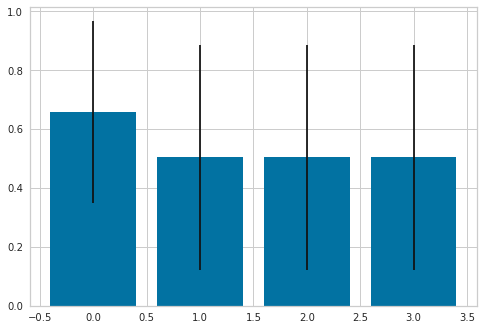

In [25]:
scores = cv_res.loc[:, cv_res.columns[cv_res.columns.str.contains('split')].tolist()]

# Plot the result
model_names = []
for model in scores.index:
    plt.errorbar(model, np.mean(scores.iloc[model]), yerr=np.std(scores.iloc[model]), capsize=5, color='k')
    plt.bar(model, np.mean(scores.iloc[model]), color='b')
# plt.xticks(scores.index, model_names)

In [18]:
y_predict = model.predict(X_test)
# score = roc_auc_score(Y_test, np.ravel(y_predict))
# Creating Print Results
string = f'The result of {model}:\n'
string += f'{classification_report(Y_test, np.ravel(y_predict))}\n'
print(string)
# print(score)

The result of SVC(C=20, cache_size=2000, probability=True):
              precision    recall  f1-score   support

           1       0.82      1.00      0.90      4562
           2       0.00      0.00      0.00       637
           3       0.00      0.00      0.00       220
           4       0.00      0.00      0.00       137

    accuracy                           0.82      5556
   macro avg       0.21      0.25      0.23      5556
weighted avg       0.67      0.82      0.74      5556




/home/mayanze/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mayanze/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mayanze/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
roc_auc_test = roc_auc_score(Y_test, model.predict_proba(X_test), multi_class='ovr', average='weighted')

In [20]:
roc_auc_test

0.5017987769342463

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


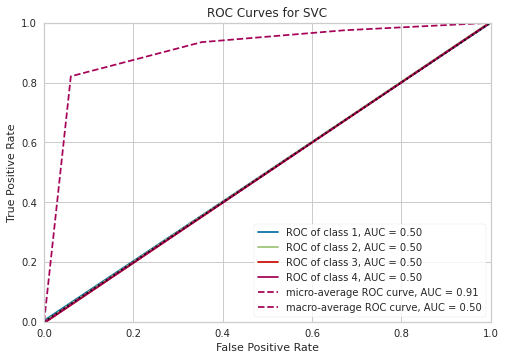

In [21]:
# visualizer = ROCAUC(model, binary=True)
visualizer = ROCAUC(model)
visualizer.fit(X_train, np.ravel(Y_train))
visualizer.score(X_test,np.ravel(Y_test))
visualizer.poof()

In [32]:
X_test.shape

(5556, 100)

In [33]:
# impute data list
import os
path = 'ImputedData'
data_list = os.listdir(path)
data_list = [x for x in data_list if x.endswith('.csv')]


total = 0
for data in data_list:
    data_path = os.path.join(path, data)
    X_test_ = pd.read_csv(data_path, index_col = 'HHX').to_numpy()
    X_test_ = feature_map_nystroem.fit_transform(X_test_)
    roc_auc_test = roc_auc_score(Y_test, grid.predict_proba(X_test_), multi_class='ovr', average='weighted')
    total += roc_auc_test
    print(roc_auc_test)

acc = total/len(data_list)
acc

0.5005451023216378
0.5006847627421896
0.5006497985687379
0.5002226672965945
0.5002807522606235


0.5004766166379567

In [38]:
X_test = data_test_features.to_numpy()
X_train = data_train_features.to_numpy()
X_train = feature_map_nystroem.fit_transform(X_train)
X_test = feature_map_nystroem.transform(X_test)

In [40]:
# Choose Features from the dataset
from sklearn.feature_selection import RFECV
import time
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(grid, X_test, np.ravel(Y_test), n_jobs=20,n_repeats=5,random_state=0, scoring='roc_auc_ovr_weighted')
run_time = time.time() - start_time
print('Take', run_time)

Take 1045.052143573761


In [43]:
svm_importance = pd.Series(result.importances_mean)
svm_std = pd.Series(result.importances_std)

In [46]:
svm_std.values

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.35752175e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.74080924e-07, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.41408636e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.38417954e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.55734606e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

<BarContainer object of 100 artists>

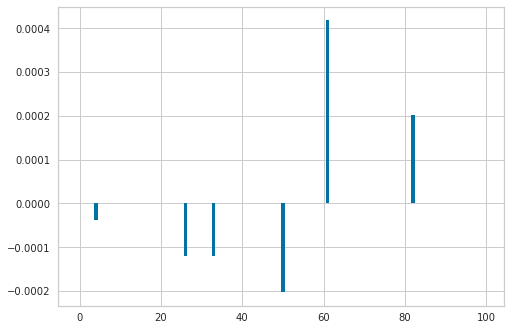

In [48]:
plt.bar(np.arange(len(svm_importance)), svm_importance)

In [ ]:
modelA = grid
# impute data list
import os
path = 'ImputedData'
data_list = os.listdir(path)
data_list = [x for x in data_list if x.endswith('.csv')]


total = 0
for data in data_list:
    data_path = os.path.join(path, data)
    X_test_ = pd.read_csv(data_path, index_col = 'HHX').to_numpy()
    X_test_ = feature_map_nystroem.fit_transform(X_test_)
    roc_auc_test = roc_auc_score(Y_test, modelA.predict_proba(X_test_), multi_class='ovr', average='weighted')
    total += roc_auc_test
    print(roc_auc_test)

acc = total/len(data_list)
acc

In [ ]:
# For model B taking 50 features into training
X_train_B = X_train[:,:50]
X_test_B = X_test[:,:50]
modelB = SVC(C=20,probability=True, cache_size=2000)
modelB.fit(X_train_B, Y_train)

pred = modelB.predict(X_test_B)
 
# print classification report
print(classification_report(Y_test, pred))

In [ ]:
import os
path = 'ImputedData'
data_list = os.listdir(path)
data_list = [x for x in data_list if x.endswith('.csv')]


total = 0
for data in data_list:
    data_path = os.path.join(path, data)
    X_test_ = pd.read_csv(data_path, index_col = 'HHX').to_numpy()
    X_test_ = feature_map_nystroem.fit_transform(X_test_)
    roc_auc_test = roc_auc_score(Y_test, modelA.predict_proba(X_test_), multi_class='ovr', average='weighted')
    total += roc_auc_test
    print(roc_auc_test)

acc = total/len(data_list)
acc